<a href="https://colab.research.google.com/github/JulioCFSdev/Maze_Generator_By_Randomizer_Prim/blob/main/Maze_Generator_By_Randomizer_Prim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

In [2]:
class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [['#'] * (2 * width + 1) for _ in range(2 * height + 1)]
        self.visited = [[False] * width for _ in range(height)]
        self.directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # up, down, left, right
        self.graph = nx.Graph()
        self.start_point = None
        self.end_point = None

    def in_bounds(self, x, y):
        # Verifica se as coordenadas (x, y) estão dentro dos limites do labirinto.
        return 0 <= x < self.width and 0 <= y < self.height

    def is_visited(self, x, y):
        # Verifica se a célula (x, y) já foi visitada durante a geração do labirinto.
        return self.visited[y][x]

    def visit(self, x, y):
        # Marca a célula (x, y) como visitada.
        self.visited[y][x] = True

    def get_neighbors(self, x, y):
        # Retorna uma lista de células vizinhas não visitadas da célula (x, y).
        neighbors = []
        for dx, dy in self.directions:
            nx, ny = x + dx, y + dy
            if self.in_bounds(nx, ny) and not self.is_visited(nx, ny):
                neighbors.append((nx, ny))
        return neighbors

    def generate_maze(self):
        # Gera um labirinto usando o algoritmo de busca em profundidade.
        stack = [(0, 0)]  # Começa na célula do canto superior esquerdo.
        self.visit(0, 0)

        while stack:
            x, y = stack[-1]
            neighbors = self.get_neighbors(x, y)

            if neighbors:
                nx, ny = random.choice(neighbors)
                dx, dy = nx - x, ny - y
                self.grid[y * 2 + 1 + dy][x * 2 + 1 + dx] = ' '  # Remove a parede
                self.visit(nx, ny)
                stack.append((nx, ny))

                # Adiciona arestas ao grafo representando o labirinto.
                self.graph.add_edge((x, y), (nx, ny))
            else:
                stack.pop()

    def generate_start_end_points(self):
        # Gera pontos de início e fim aleatoriamente garantindo que a distância mínima entre eles seja de 11 células.
        while True:
            self.start_point = (random.randint(0, self.width-1), random.randint(0, self.height-1))
            self.end_point = (random.randint(0, self.width-1), random.randint(0, self.height-1))

            shortest_path = self.shortest_path()
            if len(shortest_path) >= 21:
                break

    def shortest_path(self):
        if not self.start_point or not self.end_point:
            raise ValueError("Start and/or end points are not defined.")

        # Usa a busca em largura (BFS) para encontrar o caminho mais curto no grafo.
        queue = deque([(self.start_point, [self.start_point])])
        while queue:
            node, path = queue.popleft()
            if node == self.end_point:
                return path
            for neighbor in self.graph.neighbors(node):
                if neighbor not in path:
                    queue.append((neighbor, path + [neighbor]))

        raise ValueError("No path found between start and end points.")

    def draw_maze(self):
        # Desenha o labirinto usando matplotlib.
        plt.figure(figsize=(self.width, self.height))
        plt.axis('off')

        for y in range(2 * self.height + 1):
            for x in range(2 * self.width + 1):
                cell = self.grid[y][x]
                color = 'black' if cell == '#' else 'white'
                plt.fill([x, x + 1, x + 1, x], [y, y, y + 1, y + 1], color=color)

        plt.show()

    def draw_graph(self):
        # Desenha o grafo usando matplotlib com um título para a visão geral do labirinto.
        plt.figure(figsize=(15, 15))
        plt.title("Visão Geral do Labirinto")
        pos = {(x, y): (x, -y) for y in range(self.height) for x in range(self.width)}
        nx.draw(self.graph, pos, with_labels=False, node_size=100, node_color='lightblue')
        plt.show()

    def draw_shortest_path(self, shortest_path):
        # Desenha o caminho mais curto encontrado no grafo usando matplotlib com um título para a visão geral do menor caminho possível.
        plt.figure(figsize=(15, 15))
        plt.title("Visão Geral do MST do Ponto Inicial ao Ponto Final")
        pos = {(x, y): (x, -y) for y in range(self.height) for x in range(self.width)}

        # Separa os nós de início, fim e regulares
        start_nodes = [self.start_point]
        end_nodes = [self.end_point]
        regular_nodes = list(self.graph.nodes - {self.start_point, self.end_point})

        # Plota nós de início em verde, nós de fim em vermelho e nós regulares em azul claro
        nx.draw_networkx_nodes(self.graph, pos, nodelist=start_nodes, node_size=100, node_color='green')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=end_nodes, node_size=100, node_color='red')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=regular_nodes, node_size=100, node_color='lightblue')

        # Plota as arestas com cores diferentes para o caminho mais curto
        all_edges = self.graph.edges()
        shortest_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        other_edges = list(set(all_edges) - set(shortest_edges))

        nx.draw_networkx_edges(self.graph, pos, edgelist=shortest_edges, width=2, edge_color='yellow')
        nx.draw_networkx_edges(self.graph, pos, edgelist=other_edges, width=1, edge_color='black', alpha=0.5, arrows=False)

        plt.axis('off')
        plt.show()

Start point: (8, 24)
End point: (2, 48)
Shortest path: [(8, 24), (8, 23), (7, 23), (7, 22), (7, 21), (8, 21), (9, 21), (9, 22), (10, 22), (10, 21), (11, 21), (12, 21), (13, 21), (13, 20), (12, 20), (11, 20), (11, 19), (12, 19), (12, 18), (11, 18), (11, 17), (10, 17), (10, 18), (9, 18), (9, 19), (9, 20), (8, 20), (8, 19), (7, 19), (7, 18), (8, 18), (8, 17), (9, 17), (9, 16), (8, 16), (7, 16), (7, 15), (8, 15), (9, 15), (9, 14), (9, 13), (8, 13), (8, 14), (7, 14), (7, 13), (6, 13), (6, 14), (5, 14), (5, 15), (4, 15), (4, 16), (3, 16), (3, 15), (2, 15), (1, 15), (0, 15), (0, 16), (0, 17), (0, 18), (1, 18), (1, 17), (2, 17), (2, 18), (3, 18), (3, 19), (4, 19), (4, 20), (3, 20), (2, 20), (2, 19), (1, 19), (0, 19), (0, 20), (1, 20), (1, 21), (2, 21), (3, 21), (4, 21), (5, 21), (6, 21), (6, 22), (6, 23), (6, 24), (5, 24), (4, 24), (4, 25), (4, 26), (4, 27), (5, 27), (5, 26), (5, 25), (6, 25), (7, 25), (7, 26), (6, 26), (6, 27), (7, 27), (7, 28), (7, 29), (7, 30), (7, 31), (6, 31), (6, 32), (6

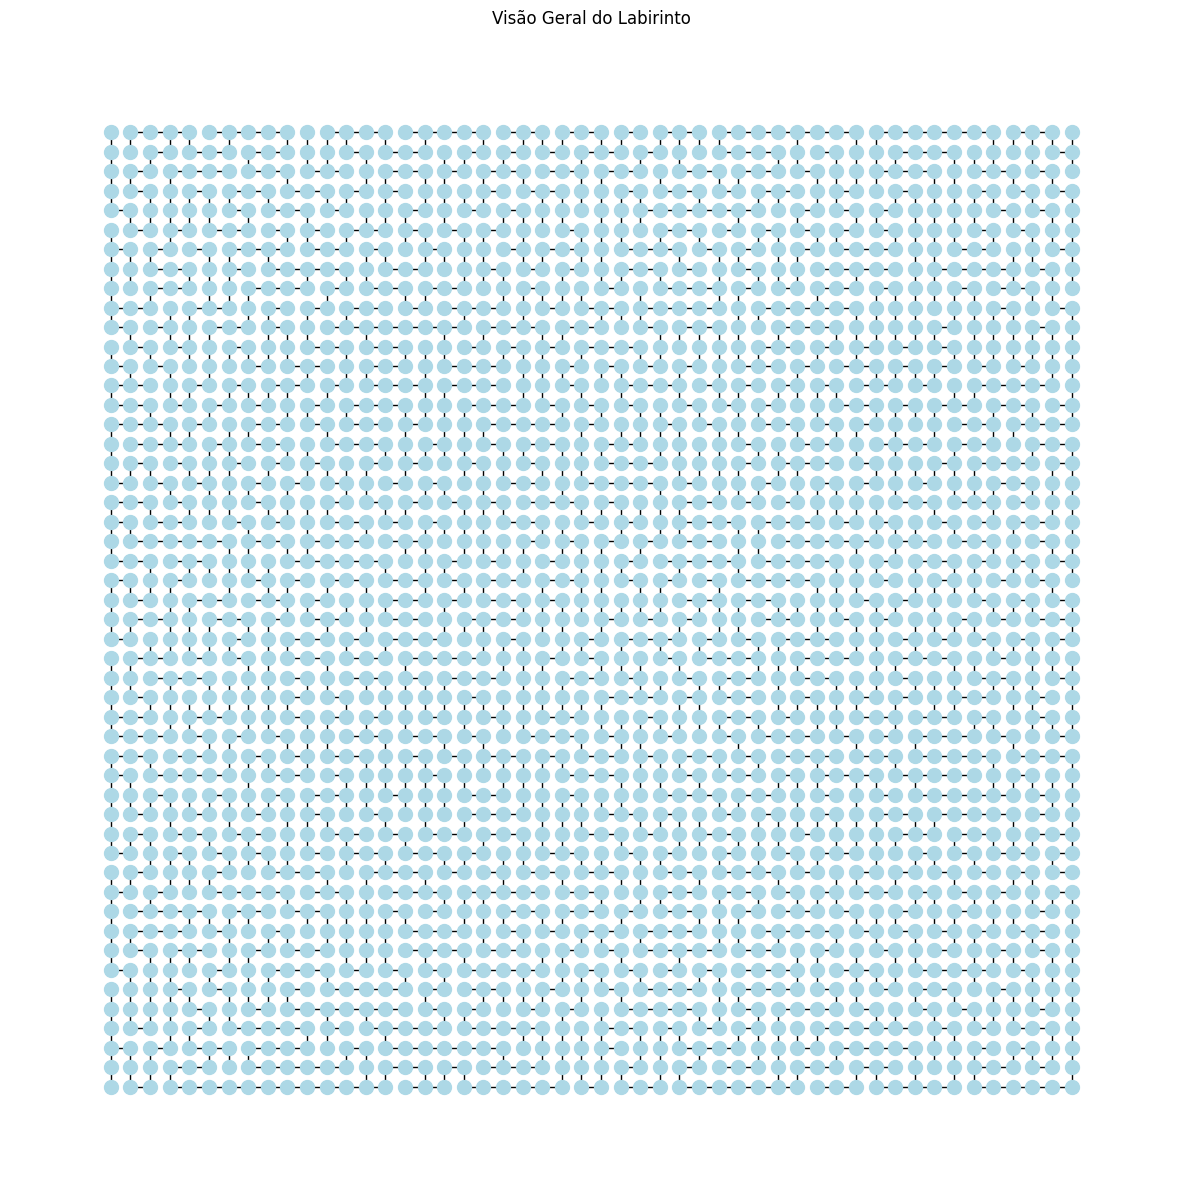

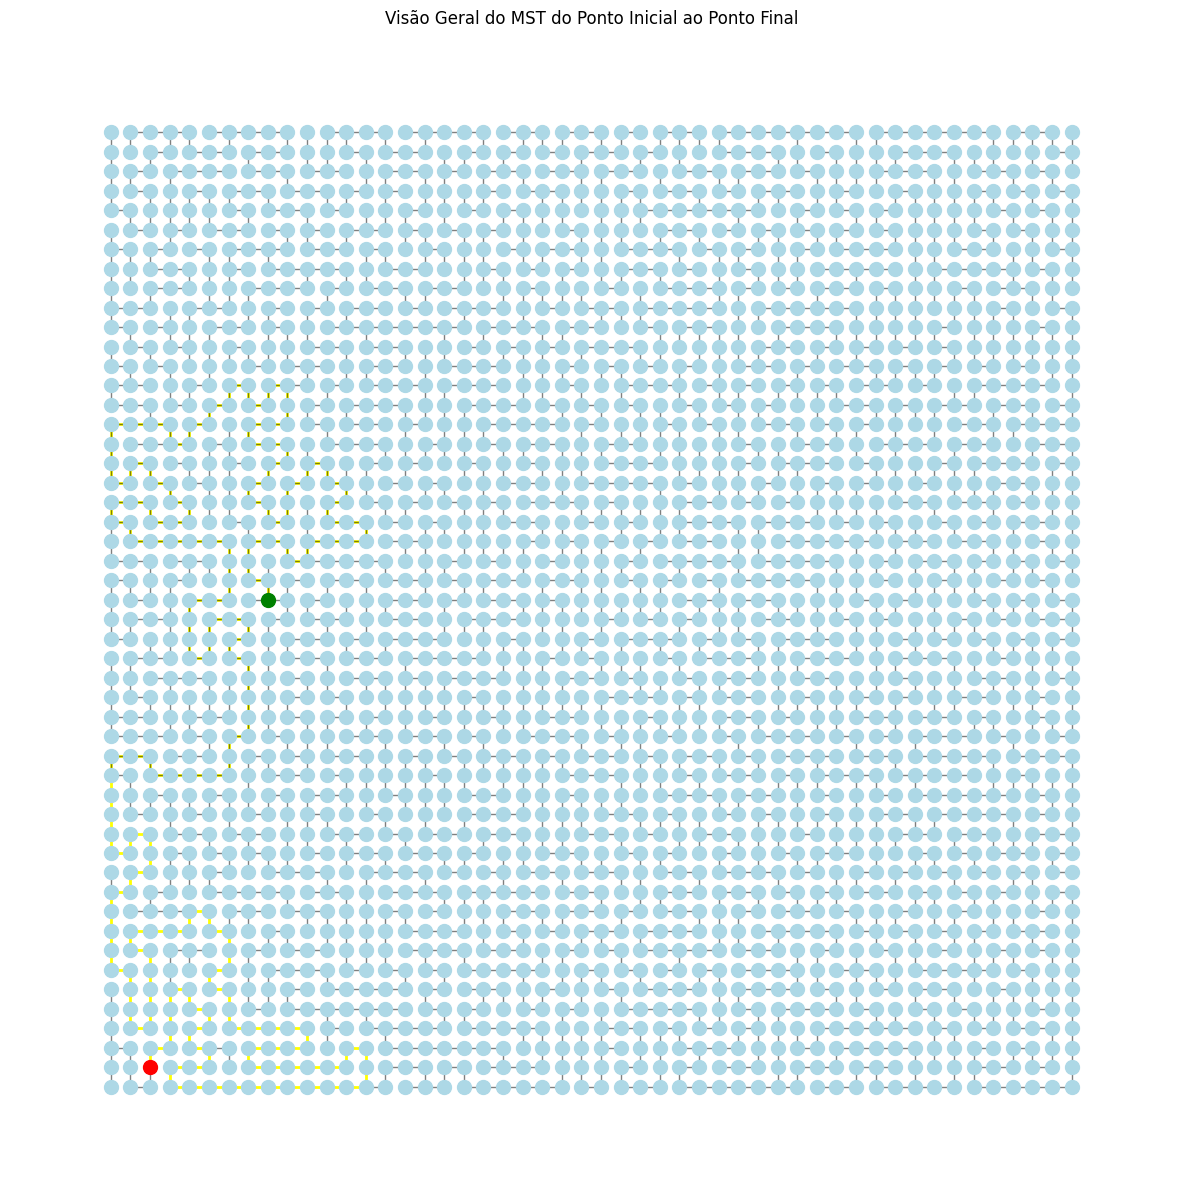

In [3]:
# Exemplo de uso:
width, height = 50, 50
maze = Maze(width, height)
maze.generate_maze()

maze.generate_start_end_points()
print("Start point:", maze.start_point)
print("End point:", maze.end_point)

shortest_path = maze.shortest_path()
print("Shortest path:", shortest_path, "\n")

# maze.draw_maze()
maze.draw_graph()
maze.draw_shortest_path(shortest_path)